In [3]:
!pip install py-midi
!pip install pretty-midi
!wget "http://www.piano-midi.de/midis/beethoven/beethoven_opus10_1.mid"

!sudo apt install -y fluidsynth
!pip install --upgrade pyfluidsynth

     |████████████████████████████████| 90 kB 3.8 MB/s 
     |████████████████████████████████| 5.6 MB 4.6 MB/s 
     |████████████████████████████████| 51 kB 7.0 MB/s 
  Created wheel for pretty-midi: filename=pretty_midi-0.2.9-py3-none-any.whl size=5591953 sha256=21194a924d81ee6243e0ca35c4fe2720577ee2823172aed6fd502c2084a770aa
  Stored in directory: /root/.cache/pip/wheels/ad/74/7c/a06473ca8dcb63efb98c1e67667ce39d52100f837835ea18fa
Successfully built pretty-midi
--2021-12-11 14:23:46--  http://www.piano-midi.de/midis/beethoven/beethoven_opus10_1.mid
Resolving www.piano-midi.de (www.piano-midi.de)... 82.165.134.185
Connecting to www.piano-midi.de (www.piano-midi.de)|82.165.134.185|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35374 (35K) [audio/midi]
Saving to: ‘beethoven_opus10_1.mid’

beethoven_opus10_1. 100%[===================>]  34.54K  --.-KB/s    in 0.002s  

2021-12-11 14:23:46 (16.3 MB/s) - ‘beethoven_opus10_1.mid’ saved [35374/35374]

Reading packa

In [4]:

import pretty_midi
import pandas as pd
import numpy as np
import collections
import tensorflow as tf
import pathlib
import glob

In [9]:
!wget "https://tinyurl.com/mpkou9t"
!ls mpkou9t*
mf_that_song = pretty_midi.PrettyMIDI("mpkou9t")

--2021-12-11 14:26:13--  https://tinyurl.com/mpkou9t
Resolving tinyurl.com (tinyurl.com)... 104.20.138.65, 104.20.139.65, 172.67.1.225, ...
Connecting to tinyurl.com (tinyurl.com)|104.20.138.65|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://free-piano-tutorials-midi.s3.amazonaws.com/Alan%20Walker%20-%20Faded/Alan_Walker_Faded.mid [following]
--2021-12-11 14:26:13--  https://free-piano-tutorials-midi.s3.amazonaws.com/Alan%20Walker%20-%20Faded/Alan_Walker_Faded.mid
Resolving free-piano-tutorials-midi.s3.amazonaws.com (free-piano-tutorials-midi.s3.amazonaws.com)... 52.216.86.155
Connecting to free-piano-tutorials-midi.s3.amazonaws.com (free-piano-tutorials-midi.s3.amazonaws.com)|52.216.86.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10460 (10K) [audio/mid]
Saving to: ‘mpkou9t.1’

mpkou9t.1           100%[===================>]  10.21K  --.-KB/s    in 0s      

2021-12-11 14:26:13 (127 MB/s) - ‘mpkou9t.1’ s

/usr/local/lib/python3.7/dist-packages/pretty_midi/pretty_midi.py:101: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  RuntimeWarning)


In [6]:
# pm = mf
data_dir = pathlib.Path('data/maestro-v2.0.0')
if not data_dir.exists():
  tf.keras.utils.get_file(
      'maestro-v2.0.0-midi.zip',
      origin='https://storage.googleapis.com/magentadata/datasets/maestro/v2.0.0/maestro-v2.0.0-midi.zip',
      extract=True,
      cache_dir='.', cache_subdir='data',
  )
filenames = glob.glob(str(data_dir/'**/*.mid*'))
# print('Number of files:', len(filenames))
# print('Number of instruments:', len(pm.instruments))
# instrument = pm.instruments[0]
# instrument_name = pretty_midi.program_to_instrument_name(instrument.program)
# print('Instrument name:', instrument_name)


59252736/59243107 [==============================] - 1s 0us/step


In [7]:
# samp_f = 100
# midi_obj = pretty_midi.PrettyMIDI(f)
# song_df = pd.DataFrame(midi_obj.get_piano_roll(fs=samp_f)).T
# song_df["time"] = np.around([x*(1/samp_f) for x in range(len(song_df))], 2)
# song_df.index = song_df["time"]
# song_df = song_df.drop("time", axis=1)

# beats_together = [np.arange(x,y, (y-x)/4) for x, y in zip(midi_obj.get_beats(), midi_obj.get_beats()[1:])]
# beats_expanded = [x for y in beats_together for x in y]
# beats_expanded = np.around(beats_expanded, 2)

# articulated_sep = []
# for b in beats_expanded[:10]:
#   note_sub_df = song_df.loc[b:b+1, :]
#   played_whole_time = note_sub_df.all(axis=0).values
#   played_whole_time = played_whole_time.reshape((-1, 1))
#   articulated_sep.append(played_whole_time)
# articulated = np.concatenate(articulated_sep, axis=1).astype(np.int)
# pd.DataFrame(articulated)[50:75]

# song_df.loc[beats_expanded[0]:beats_expanded[1], :]
note_sub_df_np = song_df.values
total_notes, not_pitches = note_sub_df_np.shape
size_of_group = 13
divisible_len = (total_notes // size_of_group) * size_of_group
num_groups = divisible_len // size_of_group
split_arr = np.dstack(np.split(note_sub_df_np[:divisible_len], num_groups))

import pdb
def note_change_for_beat_step(note_sub):
  note_change = (note_sub != note_sub[0]).all(axis=0)
  note_change = note_change.astype(np.int32)
  note_change = note_change.reshape((-1, 1))
  return note_change

# (13, 128, 14206) = split_arr.shape




NameError: ignored

In [298]:
split_arr.shape, split_arr.any(axis=0).shape

((13, 128, 14206), (128, 14206))

In [69]:
# articulated_sep = []
# for b in beats_expanded[:10]:
#   note_sub_df = song_df.loc[b:b+1, :]
#   played_whole_time = note_sub_df.all(axis=0).values
#   played_whole_time = played_whole_time.reshape((-1, 1))
#   articulated_sep.append(played_whole_time)
# articulated = np.concatenate(articulated_sep, axis=1).astype(np.int)
# pd.DataFrame(articulated)[50:75].T

np.concatenate([song_df.loc[b:b+1, :].all(axis=0).values.reshape((-1, 1)) for b in beats_expanded[:10]], axis=1).astype(np.int32)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [88]:
x = np.ones((3,2))
x[:, 1] += 1
y = 3*np.ones((3,2))
y[:, 1] += 1
z = np.concatenate([x, y], axis=1)
res = z.flatten().reshape(-1, 2)
res


array([[1., 2.],
       [3., 4.],
       [1., 2.],
       [3., 4.],
       [1., 2.],
       [3., 4.]])

In [90]:
z

array([[1., 2., 3., 4.],
       [1., 2., 3., 4.],
       [1., 2., 3., 4.]])

In [ ]:
midi_obj = pretty_midi.PrettyMIDI(f)

In [274]:

# note_played = song_to_beats(midi_obj)
note_articulated = song_to_beat_articulation(midi_obj)
# play_articulated = np.concatenate([note_played, note_articulated], axis=1)
# play_articulated.flatten().reshape(-1, 1)
# add_beat_location(to_beats)

starting


In [13]:
import pdb

In [135]:
note_played.iloc[:-1, :].shape, note_articulated

((14771, 128), (14771, 128))

In [273]:
# num_beats, num_notes = note_played.iloc[:-1, :].shape
# z = np.concatenate([note_played.iloc[:-1, :].T, note_articulated.T], axis=1)
# res = z.flatten().reshape(-1, num_beats)
# pd.DataFrame(res[50:75, 100:120])

In [11]:
def add_beat_location(input_arr_df):
  input_arr_df["ind"] = range(len(input_arr_df))
  input_arr_df["id"] = input_arr_df["ind"].apply(lambda x: x%16)

  input_arr_df[['id_0','id_1', 'id_2', 'id_3']] = input_arr_df['id'].apply(lambda x: pd.Series(list(bin(x)[2:].zfill(4))))
  input_arr_df = input_arr_df.drop(["ind", "id"], axis=1)
  for col in ["id_0", "id_1", "id_2", "id_3"]:
    input_arr_df[col] = input_arr_df[col].astype(float)
  return input_arr_df

def song_to_beats(song_df, beats_expanded):
  resampled = song_df.loc[beats_expanded]
  return resampled.values

def song_to_beat_articulation(song_df, beats_expanded):
  print("starting")
  
  note_sub_df_np = song_df.values
  # Note: adding zeros at the beginning to register the first note increase.
  # note_sub_df_np = np.concatenate([np.zeros((1, 128)), note_sub_df_np], axis=0)
  # changed = np.concatenate([(note_sub_df_np[0:1] > 0).astype(np.int32), 5*np.ones((1,128)), (note_sub_df_np[1:] > note_sub_df_np[:-1])], axis=0)
  changed = (note_sub_df_np[1:] > note_sub_df_np[:-1])
  
  total_notes, not_pitches = changed.shape
  # TODO: This is ugly
  size_of_group = len(song_df.loc[beats_expanded[0]:beats_expanded[1],:]) - 1
  divisible_len = (total_notes // size_of_group) * size_of_group
  num_groups = divisible_len // size_of_group
  split_arr = np.dstack(np.split(changed[:divisible_len], num_groups))
  note_changes = split_arr.any(axis=0).astype(np.int32)
  aa = (note_sub_df_np[0:1] > 0).astype(np.int32)
  note_changes = np.concatenate([aa.T, note_changes], axis=1)
  return note_changes

def prepare_song(midi_obj):
  samp_f = 100
  beats_together = [np.arange(x,y, (y-x)/4) for x, y in zip(mf_that_song.get_beats(), mf_that_song.get_beats()[1:])]
  beats_expanded = [x for y in beats_together for x in y]
  beats_expanded = np.around(beats_expanded, 2)

  song_df = pd.DataFrame(mf_that_song.get_piano_roll(fs=samp_f)).T
  song_df["time"] = np.around([x*(1/samp_f) for x in range(len(song_df))], 2)
  song_df.index = song_df["time"]
  song_df = song_df.drop("time", axis=1)
  note_articulated = song_to_beat_articulation(song_df, beats_expanded).T
  notes_held = song_to_beats(song_df, beats_expanded)

  min_length = min(notes_held.shape[0], note_articulated.shape[0])
  note_articulated = note_articulated[0:min_length, :].astype(np.float32)
  notes_held = notes_held[0:min_length, :]

  # prepare_song(mf_that_song)

  play_articulated_concat = np.concatenate([notes_held.T, note_articulated.T], axis=1)
  play_articulated = play_articulated_concat.flatten().reshape(-1, min_length)
  
  
  return add_beat_location(pd.DataFrame(play_articulated).T)

# prepare_song(mf)

In [13]:
preped = prepare_song(mf_that_song)
preped.T.iloc[2*50:2*50+40, 0:16]
# preped.T.iloc[:, 0:16]

starting


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102,80.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,80.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0
103,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
108,0.0,0.0,0.0,0.0,80.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,80.0,80.0,0.0,0.0
109,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [14]:


# beats_together = [np.arange(x,y, (y-x)/4) for x, y in zip(mf_that_song.get_beats(), mf_that_song.get_beats()[1:])]
# beats_expanded = [x for y in beats_together for x in y]
# beats_expanded = np.around(beats_expanded, 2)

# song_df = pd.DataFrame(mf_that_song.get_piano_roll(fs=samp_f)).T
# song_df["time"] = np.around([x*(1/samp_f) for x in range(len(song_df))], 2)
# song_df.index = song_df["time"]
# song_df = song_df.drop("time", axis=1)
# note_articulated = song_to_beat_articulation(song_df, beats_expanded).T
# notes_held = song_to_beats(song_df, beats_expanded)

# min_length = min(notes_held.shape[0], note_articulated.shape[0])
# note_articulated = note_articulated[0:min_length, :].astype(np.float32)
# notes_held = notes_held[0:min_length, :]

# # prepare_song(mf_that_song)

# play_articulated_concat = np.concatenate([notes_held.T, note_articulated.T], axis=1)
# play_articulated = play_articulated_concat.flatten().reshape(-1, min_length)
# # 51, 74
# off= 0
# #note_changes[ 73:75, 49:52] #split_arr[:, 73:75, 49:52]
# # pd.DataFrame(note_articulated).T.iloc[50:75, off:off+16]
# pd.DataFrame(play_articulated).iloc[2*50:2*50+40, off:off+16]


In [15]:
# notes_held.T.shape, note_articulated.T.shape, play_articulated_concat.shape, play_articulated.shape

NameError: ignored

In [16]:
# pd.DataFrame(notes_held).T.iloc[50:75, off:off+16]

In [17]:
# pd.DataFrame(note_articulated).T.iloc[50:75, off:off+16]

In [81]:
note_articulated.shape, notes_held.shape, play_articulated.shape

((1207, 128), (1207, 128), (256, 1207))

In [20]:
num_files = 15
song_dfs = []
for f in filenames[:num_files]:
  mf_i = pretty_midi.PrettyMIDI(f)
  # song_dfs.append(pd.DataFrame(mf.get_piano_roll(fs=10)).T)
  song_dfs.append(prepare_song(mf_i))

all_song_dfs = pd.concat(song_dfs)
all_song_dfs = (all_song_dfs > 0) * 1

starting
starting
starting
starting
starting
starting
starting
starting
starting
starting
starting
starting
starting
starting
starting


In [7]:
# mf = pretty_midi.PrettyMIDI("beethoven_opus10_1.mid")
mf = pretty_midi.PrettyMIDI("mpkou9t")

/usr/local/lib/python3.7/dist-packages/pretty_midi/pretty_midi.py:101: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  RuntimeWarning)


/usr/local/lib/python3.7/dist-packages/librosa/display.py:1336: UserWarning: Frequency axis exceeds Nyquist. Did you remember to set all spectrogram parameters in specshow?
  "Frequency axis exceeds Nyquist. "


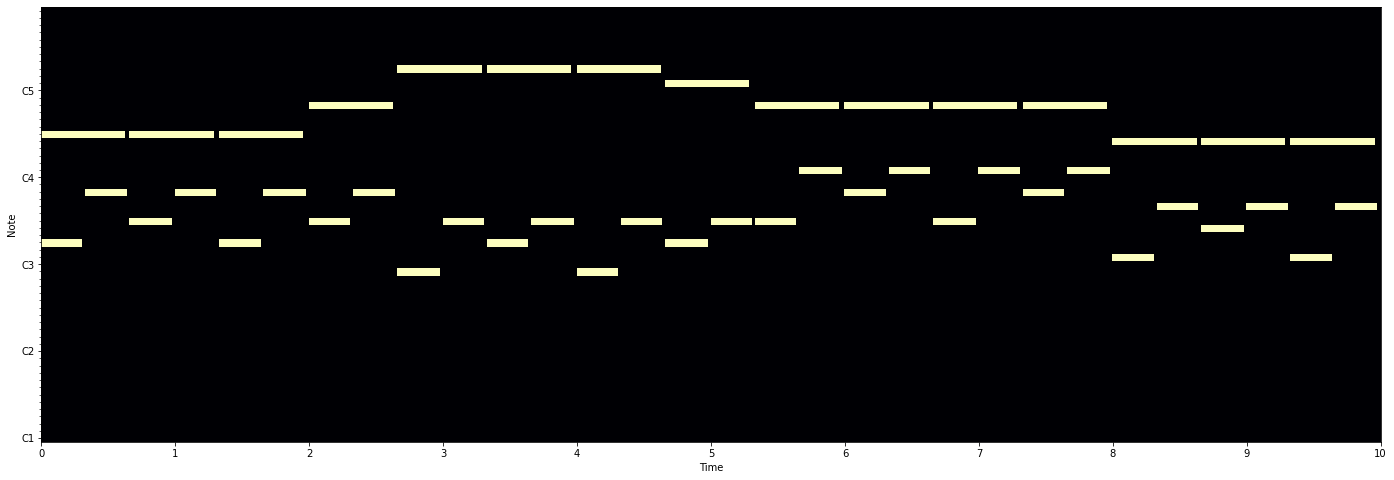

In [8]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
def plot_piano_roll(pm, start_pitch, end_pitch, fs=100):
    # Use librosa's specshow function for displaying the piano roll
    start_time = 0
    end_time = 1000
    librosa.display.specshow(pm.get_piano_roll(fs)[start_pitch:end_pitch, start_time:end_time],
                             hop_length=1, sr=fs, x_axis='time', y_axis='cqt_note',
                             fmin=pretty_midi.note_number_to_hz(start_pitch))
plt.figure(figsize=(24, 8))
plot_piano_roll(mf, 24, 84, fs=100)

In [344]:

song_tensor=tf.convert_to_tensor(all_song_dfs)
# song_tensor_reshape = tf.reshape(song_tensor, (6261, 128))
dataset = tf.data.Dataset.from_tensor_slices(song_tensor)
seq_length=15
vocab_size = 128
"""Returns TF Dataset of sequence and label examples."""
seq_length = seq_length+1

# Take 1 extra for the labels
windows = dataset.window(seq_length, shift=1, stride=1,
                            drop_remainder=True)

# `flat_map` flattens the" dataset of datasets" into a dataset of tensors
flatten = lambda x: x.batch(seq_length, drop_remainder=True)
sequences = windows.flat_map(flatten)

# Normalize note pitch
def scale_pitch(x):
  x = x/vocab_size
  return x

# Split the labels
def split_labels(sequences):
  inputs = sequences[:-1]
  print(f"sequences.shape is {sequences.shape}")
  # labels_dense = sequences[-1][0]
  labels_dense = tf.reshape(sequences[-1][0:128], (128, 1))
  return inputs, {"pitch": labels_dense}

seq_ds = sequences.map(split_labels, num_parallel_calls=tf.data.AUTOTUNE)

sequences.shape is (16, 132)


In [345]:
sequences

<FlatMapDataset shapes: (16, 132), types: tf.int64>

In [10]:
all_song_dfs.shape

(18420, 132)

In [11]:
batch_size = 64
# seq_length, _ = song_df.shape
# buffer_size = n_notes - seq_length  # the number of items in the dataset
buffer_size = 100
train_ds = (seq_ds
            .shuffle(buffer_size)
            .batch(batch_size, drop_remainder=True)
            .cache()
            .prefetch(tf.data.experimental.AUTOTUNE))

In [12]:
for seq, target in seq_ds.take(2):
  print('sequence shape:', seq.shape)
  print('target.shape:', target["pitch"].shape)

sequence shape: (15, 132)
target.shape: (128, 1)
sequence shape: (15, 132)
target.shape: (128, 1)


In [13]:
def mse_with_positive_pressure(y_true: tf.Tensor, y_pred: tf.Tensor):
  mse = (y_true - y_pred) ** 2
  positive_pressure = 10 * tf.maximum(-y_pred, 0.0)
  return tf.reduce_mean(mse + positive_pressure)

def get_fat_diagonal_mat(mat_len, one_dis):
  ones = np.ones((mat_len, mat_len), dtype=np.float32)
  for i in range(mat_len):
    for j in range(mat_len):
      if abs(i-j) > one_dis:
        ones[i, j] = 0
  return tf.convert_to_tensor(ones)


In [14]:

@tf.keras.utils.register_keras_serializable(package='Custom', name='kernel_regularizer_r')
def kernel_regularizer_a(kernel_weights):
   len_0, len_1 = kernel_weights.shape
   len_2 = int(len_1/4)
   print(len_0, len_1)
   mask = tf.concat([get_fat_diagonal_mat(len_2, 12), tf.ones((len_2, 4))], axis=1)
   mask_stacked = 1 - tf.concat([mask, mask, mask, mask], axis=0)
   print(kernel_weights.shape)
   print(mask_stacked.shape)
   penality = tf.math.reduce_sum((tf.math.abs(kernel_weights) * tf.transpose(mask_stacked)))
   return 0.01 * penality

# kernel_regularizer =
# recurrent_regularizer =

In [15]:
@tf.keras.utils.register_keras_serializable(package='Custom', name='recurrent_kernel_regularizer_b')
def recurrent_kernel_regularizer_a(recurrent_kernel_weights):
   len_0, len_1 = recurrent_kernel_weights.shape
   len_2 = int(len_1/4)
   print(len_0, len_1)
   mask = get_fat_diagonal_mat(len_2, 12)
   mask_stacked = 1 - tf.concat([mask, mask, mask, mask], axis=0)
   penality = tf.math.reduce_sum((tf.math.abs(recurrent_kernel_weights) * tf.transpose(mask_stacked)))
   return 0.01 * penality



In [16]:
seq_length = 15
input_shape = (seq_length, 132)
learning_rate = 0.0005

inputs = tf.keras.Input(input_shape)
x = tf.keras.layers.LSTM(128, kernel_regularizer=kernel_regularizer_a, return_sequences=True)(inputs)
y = tf.keras.layers.LSTM(128, kernel_regularizer=recurrent_kernel_regularizer_a, return_sequences=True)(x)
z = tf.keras.layers.LSTM(128, recurrent_regularizer=tf.keras.regularizers.L2(1), return_sequences=True)(y)
k = tf.keras.layers.LSTM(128, recurrent_regularizer=tf.keras.regularizers.L2(1))(z)

outputs = {
  'pitch': tf.keras.layers.Dense(128, activation="relu", name='pitch')(k),
}

model = tf.keras.Model(inputs, outputs)

loss = {
      'pitch': tf.keras.losses.CategoricalCrossentropy(
          from_logits=True)
}

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(loss=loss, optimizer=optimizer)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 15, 132)]         0         
                                                                 
 lstm (LSTM)                 (None, 15, 128)           133632    
                                                                 
 lstm_1 (LSTM)               (None, 15, 128)           131584    
                                                                 
 lstm_2 (LSTM)               (None, 15, 128)           131584    
                                                                 
 lstm_3 (LSTM)               (None, 128)               131584    
                                                                 
 pitch (Dense)               (None, 128)               16512     
                                                                 
Total params: 544,896
Trainable params: 544,896
Non-trainable

In [17]:
losses = model.evaluate(train_ds, return_dict=True)
losses

132 512
(132, 512)
(512, 132)
128 512
287/287 [==============================] - 22s 69ms/step - loss: 323.2171


{'loss': 323.21710205078125}

In [18]:
model.compile(
    loss=loss,
    loss_weights={
        'pitch': 1,
    },
    optimizer=optimizer,
)
# model.evaluate(train_ds, return_dict=True)

In [19]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath='./training_checkpoints/ckpt_{epoch}',
        save_weights_only=True),
    tf.keras.callbacks.EarlyStopping(
        monitor='loss',
        patience=5,
        verbose=1,
        restore_best_weights=True)
]

In [20]:
%%time
epochs = 5

history = model.fit(
    train_ds,
    epochs=epochs,
    callbacks=callbacks,
)

Epoch 1/5
132 512
(132, 512)
(512, 132)
128 512
132 512
(132, 512)
(512, 132)
128 512
287/287 [==============================] - 47s 142ms/step - loss: 75.1784
Epoch 2/5
287/287 [==============================] - 41s 141ms/step - loss: 21.5997
Epoch 3/5
287/287 [==============================] - 41s 142ms/step - loss: 28.2657
Epoch 4/5
287/287 [==============================] - 41s 142ms/step - loss: 35.1777
Epoch 5/5
287/287 [==============================] - 40s 141ms/step - loss: 42.0717
CPU times: user 5min 32s, sys: 22.9 s, total: 5min 55s
Wall time: 4min 10s


In [21]:
kern, recur_kern, bias = model.layers[1].trainable_weights

In [22]:
kern.shape, recur_kern.shape

(TensorShape([132, 512]), TensorShape([128, 512]))

In [23]:
pd.DataFrame(np.around(kern.numpy(), 3)).iloc[:, 127:200]

,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
0,-0.000,-0.039,0.093,-0.004,-0.010,0.057,-0.092,0.008,0.038,-0.044,-0.071,-0.075,0.084,0.057,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000,0.000,-0.000,0.000,0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,-0.000
1,0.000,0.081,-0.032,0.050,0.093,0.072,-0.078,-0.089,-0.043,-0.064,-0.024,-0.032,-0.018,0.028,-0.088,0.000,0.000,0.000,0.000,0.000,0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000,0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000
2,0.000,-0.020,0.012,-0.019,-0.063,0.089,0.009,-0.027,-0.039,-0.046,-0.090,-0.022,-0.008,-0.061,-0.022,-0.063,-0.000,0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000
3,0.000,-0.086,-0.021,0.035,0.007,-0.029,0.021,-0.030,0.014,0.045,0.075,-0.092,0.012,-0.077,-0.062,0.007,-0.030,-0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,0.000,0.000,0.000
4,-0.000,-0.046,-0.058,-0.038,0.067,-0.067,-0.090,-0.035,-0.059,-0.010,0.096,-0.068,0.078,0.013,0.086,0.086,-0.089,0.039,-0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000,0.000,-0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,0.039,-0.000,0.000,0.000,-0.000,0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000,0.000,0.000,-0.000,-0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.000
128,-0.022,-0.056,0.103,0.027,0.105,-0.021,-0.002,-0.007,0.015,0.090,-0.066,-0.031,0.043,0.057,-0.107,0.009,0.001,0.070,0.101,-0.022,0.025,0.012,-0.061,0.081,0.073,0.064,-0.038,0.033,0.004,0.110,0.008,0.025,0.077,-0.066,0.001,0.017,-0.052,0.072,-0.011,-0.023,-0.074,0.016,-0.022,-0.036,0.016,-0.075,0.090,-0.050,-0.044,-0.043,0.045,0.055,-0.010,-0.014,-0.077,0.069,0.010,0.045,0.055,0.062,-0.050,0.056,-0.070,-0.018,0.017,0.033,-0.051,0.041,0.113,0.075,0.047,-0.065,-0.087
129,-0.074,0.094,0.062,0.089,-0.068,0.028,-0.022

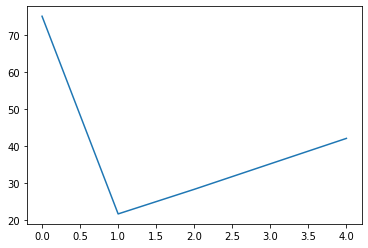

In [24]:
import matplotlib.pyplot as plt
plt.plot(history.epoch, history.history['loss'], label='total loss')
plt.show()

In [25]:
# visualize results / play

In [26]:
def predict_notes(size=10):
  outputs = []
  all_probs = []
  offset = np.random.choice(range(len(all_song_dfs)-seq_length))
  # offset= 1233
  input_notes = all_song_dfs.iloc[offset: offset+seq_length]
  input_notes_reshape = input_notes.values.reshape((1, seq_length, 132))
  last_beats =[str(x) for x in input_notes_reshape[:, -1, -4:][0]]
  last_beats_int = int("".join(last_beats), 2)
  print(input_notes_reshape.shape)
  for l in range(size):
    probs = model.predict(input_notes_reshape)["pitch"].flatten()
    probs = probs/probs.sum()
    selected = np.random.choice(range(len(probs)), p=probs, size=2)
    out = np.zeros_like(probs)
    out[selected] = 1
    # out[probs > 0.5 ] = 1
    outputs.append(out)
    all_probs.append(probs)
    
    last_beats_int += 1
    last_beats_int = last_beats_int%16
    next_beats_ind = [int(x) for x in bin(last_beats_int)[2:].zfill(4)]
    
    
    last_new_note = np.concatenate([out, next_beats_ind]).reshape((1,1,132))
    input_notes_reshape = np.concatenate([input_notes_reshape[:, 1:, :], last_new_note], axis=1)
    
  return pd.DataFrame(outputs), pd.DataFrame(all_probs)
predicted2, pred_probs = predict_notes(100)

(1, 15, 132)


In [32]:
def piano_roll_to_pretty_midi(piano_roll, fs=100, program=0):
    '''Convert a Piano Roll array into a PrettyMidi object
     with a single instrument.
    Parameters
    ----------
    piano_roll : np.ndarray, shape=(128,frames), dtype=int
        Piano roll of one instrument
    fs : int
        Sampling frequency of the columns, i.e. each column is spaced apart
        by ``1./fs`` seconds.
    program : int
        The program number of the instrument.
    Returns
    -------
    midi_object : pretty_midi.PrettyMIDI
        A pretty_midi.PrettyMIDI class instance describing
        the piano roll.
    '''
    notes, frames = piano_roll.shape
    pm = pretty_midi.PrettyMIDI()
    instrument = pretty_midi.Instrument(program=program)

    # pad 1 column of zeros so we can acknowledge inital and ending events
    piano_roll = np.pad(piano_roll, [(0, 0), (1, 1)], 'constant')

    # use changes in velocities to find note on / note off events
    velocity_changes = np.nonzero(np.diff(piano_roll).T)

    # keep track on velocities and note on times
    prev_velocities = np.zeros(notes, dtype=int)
    note_on_time = np.zeros(notes)

    for time, note in zip(*velocity_changes):
        # use time + 1 because of padding above
        velocity = piano_roll[note, time + 1]
        time = time / fs
        if velocity > 0:
            if prev_velocities[note] == 0:
                note_on_time[note] = time
                prev_velocities[note] = velocity
        else:
            pm_note = pretty_midi.Note(
                velocity=prev_velocities[note],
                pitch=note,
                start=note_on_time[note],
                end=time)
            instrument.notes.append(pm_note)
            prev_velocities[note] = 0
    pm.instruments.append(instrument)
    return pm

In [28]:
# Sampling rate for audio playback
import fluidsynth
from IPython import display
_SAMPLING_RATE = 16000
def display_audio(pm: pretty_midi.PrettyMIDI, seconds=30):
  waveform = pm.fluidsynth(fs=_SAMPLING_RATE)
  # Take a sample of the generated waveform to mitigate kernel resets
  waveform_short = waveform[:seconds*_SAMPLING_RATE]
  return display.Audio(waveform_short, rate=_SAMPLING_RATE)
display_audio(mf)

In [33]:
mf_out = piano_roll_to_pretty_midi(predicted2.T*40, fs=(0.75/0.17))
display_audio(mf_out)

/usr/local/lib/python3.7/dist-packages/librosa/display.py:1336: UserWarning: Frequency axis exceeds Nyquist. Did you remember to set all spectrogram parameters in specshow?
  "Frequency axis exceeds Nyquist. "


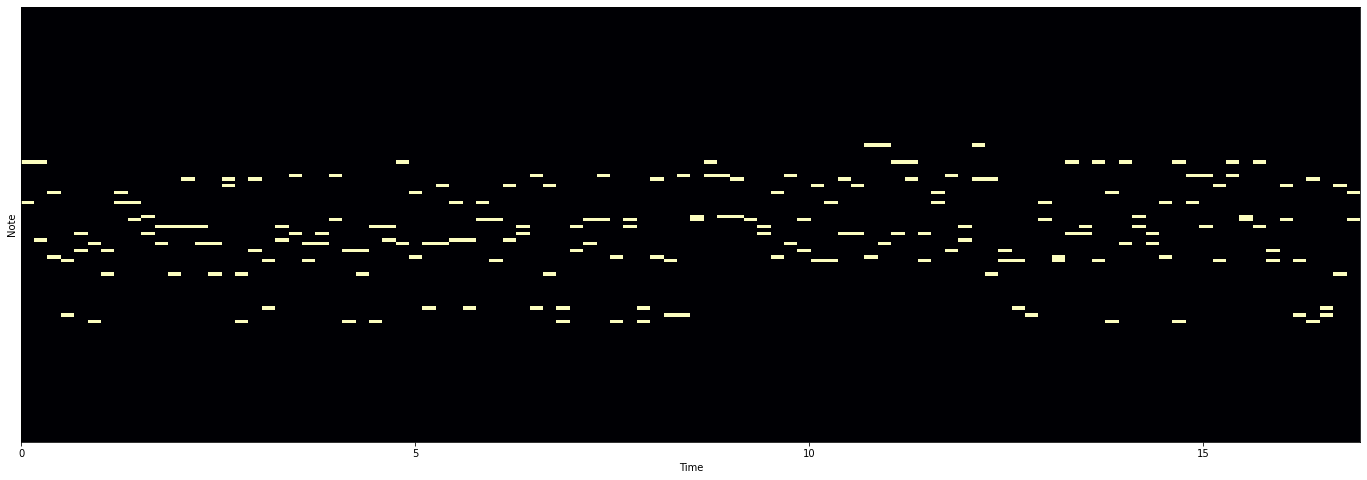

In [34]:
# def plot_pred_piano_roll(df, start_pitch, end_pitch):
#     # Use librosa's specshow function for displaying the piano roll
#     start_time = 0
#     end_time = 1000
fs=1/0.17
start_pitch=0
end_pitch=128
plt.figure(figsize=(24, 8))
librosa.display.specshow(predicted2.T.values,
                          hop_length=1, sr=fs, x_axis='time', y_axis='cqt_note',
                          fmin=pretty_midi.note_number_to_hz(start_pitch))

# plot_pred_piano_roll(predicted.T, 0, 128)